# **Identification of Traffic Signs using CNN**

In [ ]:
## model is trained on ~35000 images containing 43 different traffic signs
## the different traffic signs and the corresponding labels are present in signnames.csv file

# Importing necessary libraries

In [ ]:
import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 
import pickle as pkl
import pandas as pd
import numpy as np
import random
from keras.models import load_model
from PIL import Image
from numpy import asarray
from termcolor import colored

# Data Import and Exploration

In [ ]:
## cloning repo containing the traffic sign dataset
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
remote: Counting objects: 6, done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0)
Unpacking objects: 100% (6/6), done.


In [ ]:
from google.colab import drive
drive.mount('/content/german-traffic-signs/gdrive')

Mounted at /content/german-traffic-signs/gdrive


In [ ]:
## listing the contents
!ls german-traffic-signs

gdrive	signnames.csv  test.p  train.p	valid.p


In [ ]:
## loading csv data
data= pd.read_csv('german-traffic-signs/signnames.csv')

In [ ]:
data.head()

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [ ]:
## loading pickled dataset
with open("german-traffic-signs/train.p",mode='rb') as training:
  train=pkl.load(training)

with open("german-traffic-signs/test.p",mode='rb') as testing:
  test=pkl.load(testing)

with open("german-traffic-signs/valid.p",mode='rb') as validation:
  valid=pkl.load(validation)  

In [ ]:
X_train, y_train= train['features'], train['labels']
X_validation, y_validation= valid['features'], valid['labels']
X_test, y_test= test['features'], test['labels']

In [ ]:
print(X_train.shape,X_test.shape,X_validation.shape)

(34799, 32, 32, 3) (12630, 32, 32, 3) (4410, 32, 32, 3)


image label=15


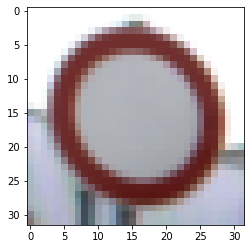

In [ ]:
plt.figure(figsize=[4,4])
index=np.random.randint(1, len(X_train))
plt.imshow(X_train[index])
print("image label={}".format(y_train[index]))

# Image Preprocessing

In [ ]:
##shuffling data
from sklearn.utils import shuffle
X_train, y_train= shuffle(X_train, y_train)

In [ ]:
def preprocessing (img):
  ## converting to  greyscale
  img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  ## histogram equalization 
  img= cv2.equalizeHist(img)
  ## normalization
  img= img/255
  return img

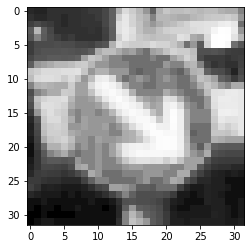

In [ ]:
plt.imshow(preprocessing(X_train[index]), cmap='gray')

In [ ]:
## preprocessing every image in each of the 3 datasets
X_train_processed=np.array(list(map(preprocessing, X_train)))
X_test_processed=np.array(list(map(preprocessing, X_test)))
X_validation_processed=np.array(list(map(preprocessing, X_validation)))

In [ ]:
X_train_processed=X_train_processed.reshape(34799,32,32,1)
X_test_processed=X_test_processed.reshape(12630,32,32,1)
X_validation_processed=X_validation_processed.reshape(4410,32,32,1)

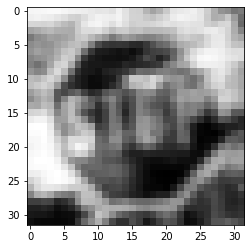

In [ ]:
plt.imshow((X_train_processed[7431].squeeze()), cmap='gray')

# Building Deep Convolutional Neural Network

In [ ]:
model = Sequential()
# the convolutional layer
# filters, size of filters, input_shape, activation_function
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,1)))

# pooling layer for downscaling
model.add(MaxPooling2D(pool_size=(2,2)))

# place a dropout layer..25% neurons are dropped
model.add(Dropout(0.25))

# another convolutional layer
model.add(Conv2D(64,(5,5),activation='relu'))

# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Flattening the image to 1 dimensional array
model.add(Flatten())

# dense layer : amount of nodes, activation
model.add(Dense(256,activation='relu'))

# place a dropout layer
# 0.5 drop out rate
model.add(Dropout(0.5))

# defining the ouput layer of the network
model.add(Dense(43,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               4

In [ ]:
#compile our model
model.compile(Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_processed,
                    y_train,
                    batch_size=500,
                    epochs=75,
                    verbose=1,
                    validation_data=(X_validation_processed,y_validation))

Epoch 1/75
70/70 [==============================] - 1s 16ms/step - loss: 3.5630 - accuracy: 0.0653 - val_loss: 3.4651 - val_accuracy: 0.1828
Epoch 2/75
70/70 [==============================] - 1s 13ms/step - loss: 3.2823 - accuracy: 0.1579 - val_loss: 3.0662 - val_accuracy: 0.3088
Epoch 3/75
70/70 [==============================] - 1s 13ms/step - loss: 2.7192 - accuracy: 0.3238 - val_loss: 2.3786 - val_accuracy: 0.4179
Epoch 4/75
70/70 [==============================] - 1s 13ms/step - loss: 2.1783 - accuracy: 0.4260 - val_loss: 1.8907 - val_accuracy: 0.5025
Epoch 5/75
70/70 [==============================] - 1s 13ms/step - loss: 1.8171 - accuracy: 0.4977 - val_loss: 1.5675 - val_accuracy: 0.5696
Epoch 6/75
70/70 [==============================] - 1s 12ms/step - loss: 1.5624 - accuracy: 0.5535 - val_loss: 1.3098 - val_accuracy: 0.6531
Epoch 7/75
70/70 [==============================] - 1s 13ms/step - loss: 1.3752 - accuracy: 0.5981 - val_loss: 1.1322 - val_accuracy: 0.7054
Epoch 8/75
70

# Performance Evaluation

In [ ]:
## performance of blind data

score = model.evaluate(X_test_processed,y_test)
print('Test accuracy',score[1])

395/395 [==============================] - 1s 2ms/step - loss: 0.2683 - accuracy: 0.9305
Test accuracy 0.9304829835891724


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epochs')

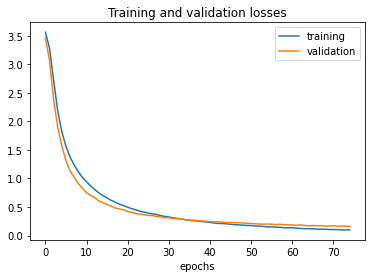

In [ ]:
## plotting training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation losses')
plt.xlabel('epochs')


Text(0.5, 0, 'epochs')

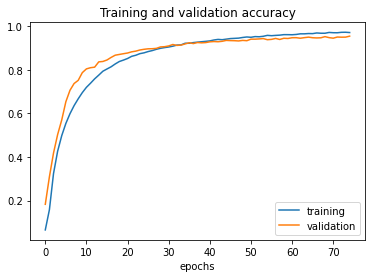

In [ ]:
## plotting training and validation accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epochs')

In [ ]:
## prediction

prediction = model.predict_classes(X_test_processed)
y_true_label= y_test

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


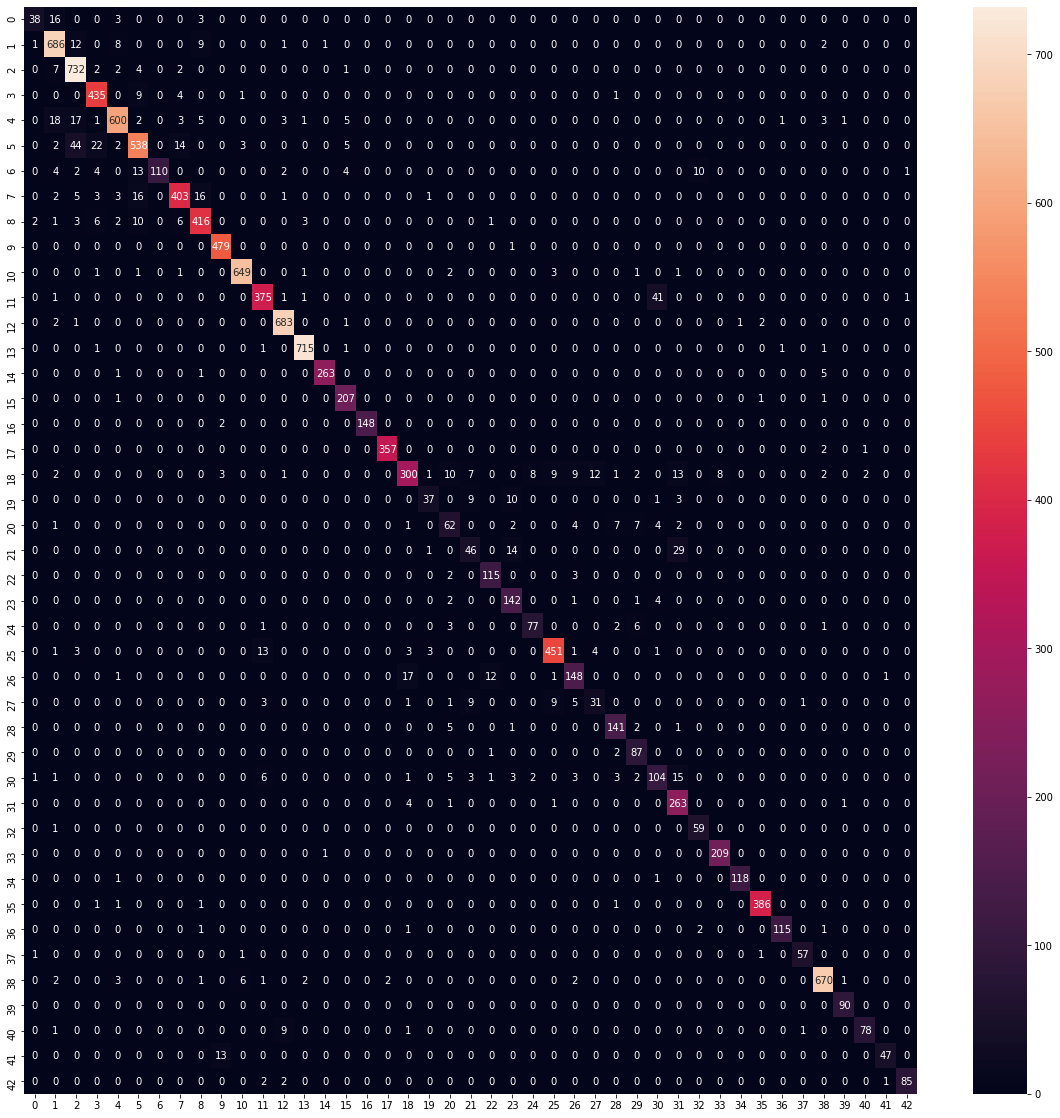

In [ ]:
## confusion matrix

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_true_label,prediction)
plt.figure(figsize=(20,20))
sns.heatmap(matrix,annot=True, fmt='g')

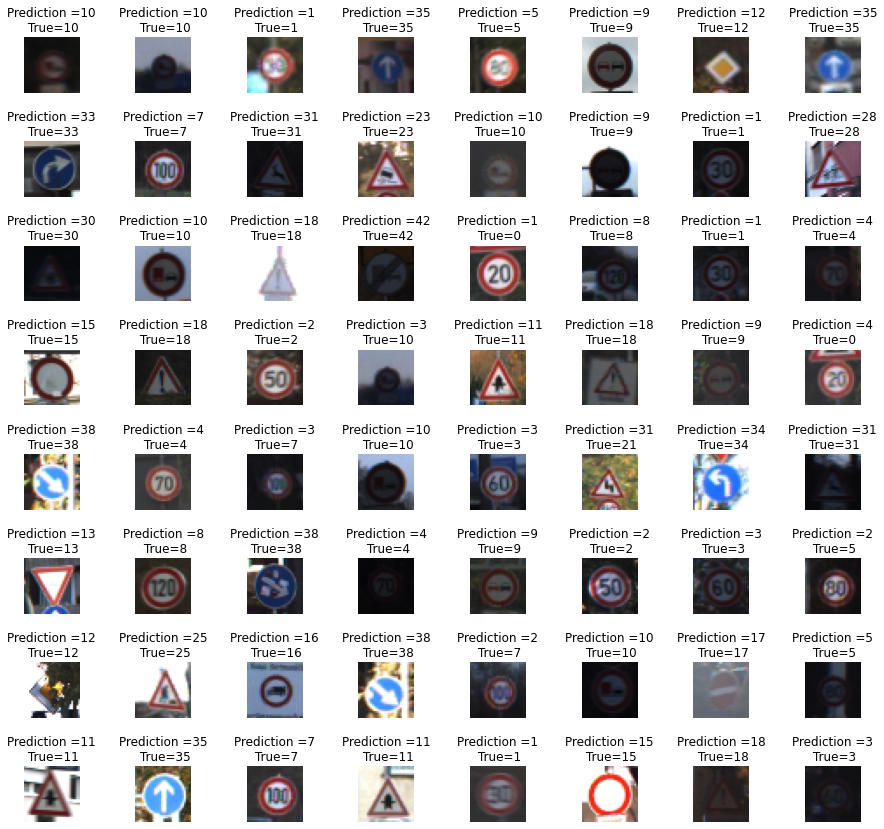

In [ ]:
## deploying model on random images from test dataset

L=8
W=8
index = np.random.randint(len(X_test))
fig , axes = plt.subplots(L,W,figsize=(15,15))
axes = axes.ravel()
for i in range(0,L*W):
  index = np.random.randint(len(X_test))
  axes[i].imshow(X_test[index])
  axes[i].set_title('Prediction ={}\n True={}'.format(prediction[index],y_true_label[index]))
  axes[i].axis('off')
plt.subplots_adjust(wspace=1)


In [ ]:
## saving the model
model.save('traffic_sign_model.h5')

## Creating a function around the model for easy deployment


In [ ]:
def traffic_sign_classifier(img):
  ##numpy array
  img2=asarray(img) 
  ## grayscale
  img3= cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
  ## histogram equalization 
  img4= cv2.equalizeHist(img3)
  ## normalization
  img5= img4/255
  test1=cv2.resize(img5, (32,32))
  test=test1.reshape(1,32,32,1)
  signs= pd.read_csv('german-traffic-signs/signnames.csv')
  classifier=load_model('traffic_sign_model.h5')
  label=classifier.predict_classes(test)
  sign_name=signs['SignName'].loc[signs['ClassId']==label[0]].values[0]
  print(colored("This traffic sign means: %s"%sign_name,color='blue',attrs=['bold']))
  


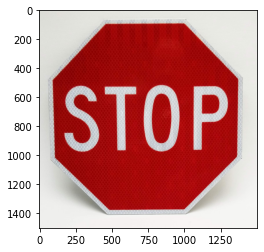

In [ ]:
## testing it on a random image from the internet (.jpg/.png)

image=Image.open('german-traffic-signs/stop_sign.jpg')
plt.imshow(image)


In [ ]:
## Let's check the output

traffic_sign_classifier(image)

This traffic sign means: Stop
